In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_exames = pd.read_csv('datasets/exame_diabetes.csv')

In [3]:
df_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id_paciente  100 non-null    int64 
 1   genero       100 non-null    object
 2   idade        100 non-null    int64 
 3   peso         100 non-null    int64 
 4   altura       100 non-null    int64 
 5   resultado    100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


In [4]:
df_exames.head()

,id_paciente,genero,idade,peso,altura,resultado
0,1,M,46,83,165,98
1,2,F,23,83,164,82
2,3,M,39,71,154,93
3,4,F,26,103,165,95
4,5,M,27,55,176,100


In [5]:
# Remove coluna id_paciente porque ela não é relevante para a análise
df_exames.drop('id_paciente', axis=1, inplace=True)
df_exames.head()

,genero,idade,peso,altura,resultado
0,M,46,83,165,98
1,F,23,83,164,82
2,M,39,71,154,93
3,F,26,103,165,95
4,M,27,55,176,100


In [6]:
# Aplica one-hot encoding na coluna "genero" para transformar em colunas binárias
df_exames = pd.get_dummies(df_exames, columns=['genero'], dtype="int64")
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M
0,46,83,165,98,0,1
1,23,83,164,82,1,0
2,39,71,154,93,0,1
3,26,103,165,95,1,0
4,27,55,176,100,0,1


In [7]:
# Cria uma nova feature para o IMC
df_exames['imc'] = df_exames['peso'] / ((df_exames['altura'] / 100) ** 2)
df_exames.head()

,idade,peso,altura,resultado,genero_F,genero_M,imc
0,46,83,165,98,0,1,30.486685
1,23,83,164,82,1,0,30.859607
2,39,71,154,93,0,1,29.937595
3,26,103,165,95,1,0,37.832874
4,27,55,176,100,0,1,17.755682


<Axes: >

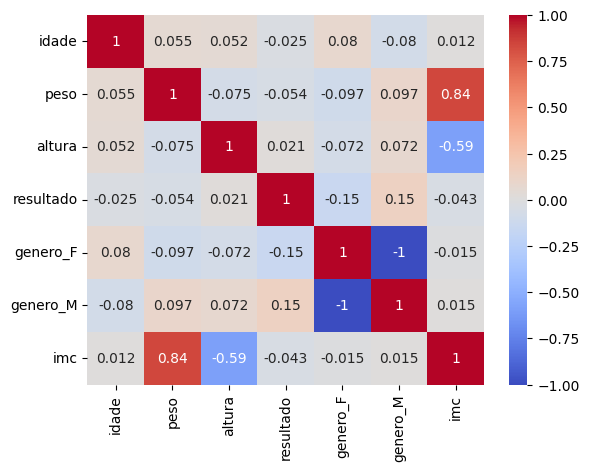

In [8]:
# Verifica a correlação entre as variáveis
sns.heatmap(df_exames.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

<Axes: >

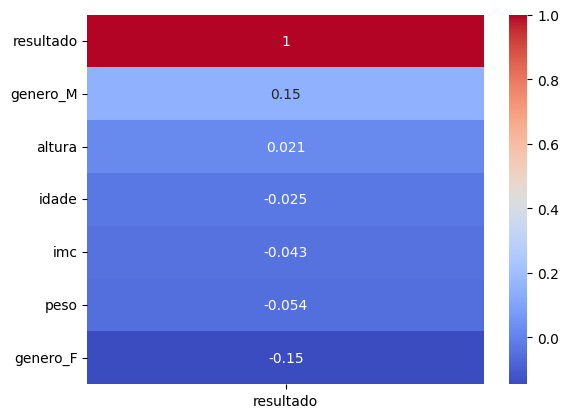

In [9]:
# Verifica a correlação entre as variáveis e o resultado (target)
sns.heatmap(
    df_exames.corr()[["resultado"]].sort_values(by="resultado", ascending=False),
    annot=True,
    cmap='coolwarm',
)

array([[<Axes: xlabel='idade', ylabel='idade'>,
        <Axes: xlabel='peso', ylabel='idade'>,
        <Axes: xlabel='altura', ylabel='idade'>,
        <Axes: xlabel='resultado', ylabel='idade'>,
        <Axes: xlabel='genero_F', ylabel='idade'>,
        <Axes: xlabel='genero_M', ylabel='idade'>,
        <Axes: xlabel='imc', ylabel='idade'>],
       [<Axes: xlabel='idade', ylabel='peso'>,
        <Axes: xlabel='peso', ylabel='peso'>,
        <Axes: xlabel='altura', ylabel='peso'>,
        <Axes: xlabel='resultado', ylabel='peso'>,
        <Axes: xlabel='genero_F', ylabel='peso'>,
        <Axes: xlabel='genero_M', ylabel='peso'>,
        <Axes: xlabel='imc', ylabel='peso'>],
       [<Axes: xlabel='idade', ylabel='altura'>,
        <Axes: xlabel='peso', ylabel='altura'>,
        <Axes: xlabel='altura', ylabel='altura'>,
        <Axes: xlabel='resultado', ylabel='altura'>,
        <Axes: xlabel='genero_F', ylabel='altura'>,
        <Axes: xlabel='genero_M', ylabel='altura'>,
        <Axes

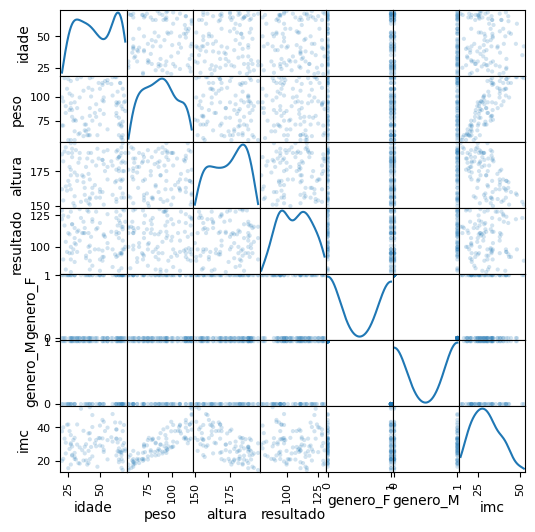

In [10]:
# Plota um gráfico de dispersão entre as variáveis
pd.plotting.scatter_matrix(df_exames, figsize=(6, 6), alpha=0.2, diagonal='kde')

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'peso'}>,
        <Axes: title={'center': 'altura'}>,
        <Axes: title={'center': 'resultado'}>],
       [<Axes: title={'center': 'genero_F'}>,
        <Axes: title={'center': 'genero_M'}>,
        <Axes: title={'center': 'imc'}>, <Axes: >]], dtype=object)

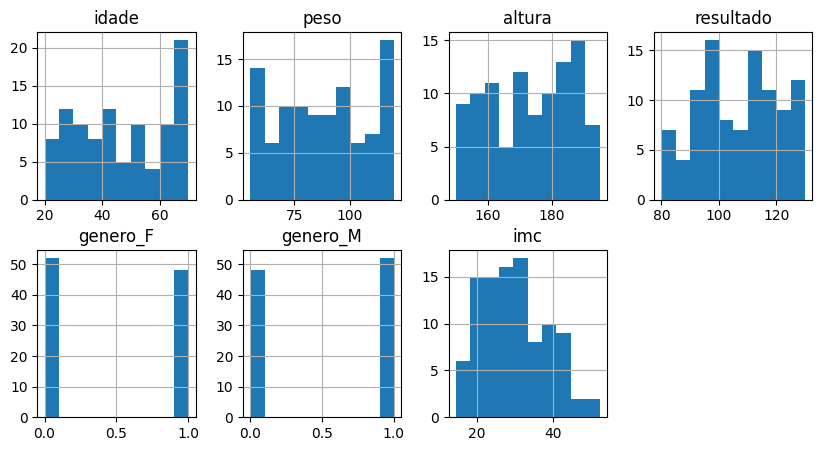

In [11]:
# Histograma de todas as variáveis
df_exames.hist(figsize=(10, 5), layout=(2, 4))

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

## Modelo 1 - Sem IMC

In [13]:
X = df_exames.drop(columns=['resultado', 'imc'], axis=1)
y = df_exames['resultado']

In [14]:
X.head()

,idade,peso,altura,genero_F,genero_M
0,46,83,165,0,1
1,23,83,164,1,0
2,39,71,154,0,1
3,26,103,165,1,0
4,27,55,176,0,1


In [15]:
y.head()

0     98
1     82
2     93
3     95
4    100
Name: resultado, dtype: int64

In [16]:
# Divide o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [17]:
# Treina o modelo
model_1 = LinearRegression().fit(X_train, y_train)

In [18]:
# Gera previsões para o conjunto de teste
y_pred = model_1.predict(X_test)

In [19]:
y_pred

array([ 99.6684178 , 111.15467732, 113.11211654, 108.92788908,
       106.38206401, 107.30939688, 109.65461594, 112.00335574,
       111.06900447, 109.78672617, 112.35808062, 112.28232464,
       111.9380202 , 108.10634945,  98.35810505, 108.24066307,
       107.47444699, 107.86866238, 108.45528721, 106.47405474,
       108.68462818, 107.39800684, 105.52920918, 101.5310878 ,
       107.73027652, 103.02436766, 105.65307386, 112.03833836,
       105.49217347, 100.44933075])

In [20]:
# Coeficientes do modelo (equação da reta)
model_1.coef_

array([-0.00694816, -0.0788198 ,  0.10991808, -2.96913112,  2.96913112])

In [21]:
# Intercepto do modelo
model_1.intercept_

np.float64(94.21133142019876)

In [22]:
# R2 Score do conjunto de treinamento
model_1.score(X_train, y_train)

0.06218388634297234

In [23]:
# R2 Score do conjunto de teste
model_1.score(X_test, y_test)

-0.13640904479106397

In [24]:
# R2 Score do conjunto de teste com a função r2_score
r2_score(y_test, y_pred)

-0.13640904479106397

In [25]:
# MAE do modelo
mean_absolute_error(y_test, y_pred)

np.float64(12.695569181179541)

## Modelo 2 - Apenas IMC

In [26]:
X = pd.DataFrame(df_exames["imc"])
y = df_exames["resultado"]

In [27]:
X.head()

,imc
0,30.486685
1,30.859607
2,29.937595
3,37.832874
4,17.755682


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=51)

In [29]:
model_2 = LinearRegression().fit(X_train, y_train)

In [30]:
y_pred = model_2.predict(X_test)

In [31]:
y_pred

array([102.73796795, 107.63459815, 108.58489716, 105.70201829,
       103.49767627, 108.73954738, 106.19637687, 108.30118863,
       107.77627304, 106.26623629, 108.10220438, 108.18040704,
       107.64653815, 104.90037915, 101.0377542 , 105.66044363,
       104.93184853, 109.01470939, 105.54141413, 103.46672578,
       105.42716889, 108.77686903, 107.65316149, 104.46837648,
       105.02409479, 105.70201829, 102.84895739, 108.11389027,
       107.77143433, 103.72326007])

In [32]:
model_2.coef_

array([-0.21677589])

In [33]:
model_2.intercept_

np.float64(112.15019229088837)

In [34]:
# R2 Score do conjunto de treinamento
model_2.score(X_train, y_train)

0.015285962664806862

In [35]:
# R2 Score do conjunto de teste
model_2.score(X_test, y_test)

-0.08898328562401758

In [36]:
# MAE do modelo
mean_absolute_error(y_test, y_pred)

np.float64(12.5056514070601)

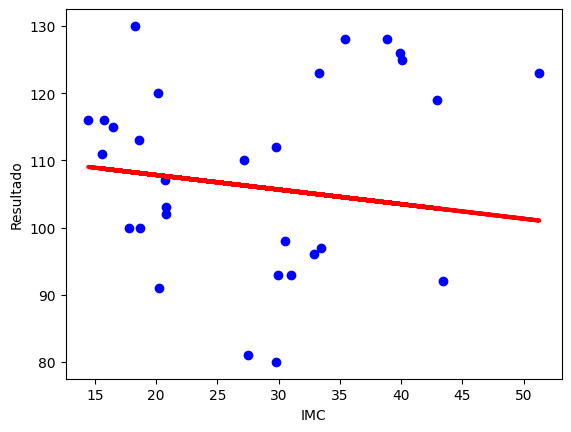

In [40]:
# Plota o gráfico de dispersão com a reta de regressão
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('IMC')
plt.ylabel('Resultado')
plt.show()
